In this worked example, we seek to apply the k-NN algorithm to a dataset called beers.

The dataset has already been split into two different sets: one for training (beer_training.csv) and one for testing (beer_test.csv)

The dependent variable that we are trying to predict is style, which can be one of 3 classes: ale, lager or stout.

In this example we will see the importance of maintaining separate training and test data, as well as how to tune the hyperparameters of a machine learning model.

In [15]:
import pandas as pd

# details for iris dataset - this is a very simple dataset that is easy to get good results on
# training_file = "iris_training.csv"
# test_file = "iris_test.csv"
# independent_cols = ["sepal_length","sepal_width","petal_length","petal_width"]
# dependent_col = "class"

# details for beer dataset
training_file = "beer_training.csv"
test_file = "beer_test.csv"
independent_cols = ["calorific_value", "nitrogen", "turbidity", "alcohol", "sugars", "bitterness", "beer_id", 
                    "colour", "degree_of_fermentation"]
dependent_col = "style"

# Here we load our training dataset in from the training file using the pandas library
df_training = pd.read_csv(training_file)
print(df_training.head())
print(df_training.shape)

   calorific_value  nitrogen  turbidity style   alcohol  sugars  bitterness  \
0        45.305310  0.459548   1.917273   ale  4.227692   16.67   12.568947   
1        43.889381  0.548977   3.186364   ale  4.289231   16.73   14.974000   
2        41.588496  0.542847   1.568182   ale  4.344615   16.48   11.848789   
3        44.553097  0.480301   1.871818   ale  4.424615   18.59   13.879632   
4        41.013274  0.441860   2.345455   ale  4.264615   16.35   12.186053   

   beer_id  colour  degree_of_fermentation  
0      167   11.04               62.178571  
1      128   13.44               63.032857  
2       88   14.04               63.468571  
3      147   12.48               63.531429  
4       74   12.12               63.747143  
(124, 10)


In [16]:
# set up a matrix X containing the independent variables from the training data
X_training = df_training.loc[:,independent_cols]
print(X_training.head())
print(X_training.shape)

   calorific_value  nitrogen  turbidity   alcohol  sugars  bitterness  \
0        45.305310  0.459548   1.917273  4.227692   16.67   12.568947   
1        43.889381  0.548977   3.186364  4.289231   16.73   14.974000   
2        41.588496  0.542847   1.568182  4.344615   16.48   11.848789   
3        44.553097  0.480301   1.871818  4.424615   18.59   13.879632   
4        41.013274  0.441860   2.345455  4.264615   16.35   12.186053   

   beer_id  colour  degree_of_fermentation  
0      167   11.04               62.178571  
1      128   13.44               63.032857  
2       88   14.04               63.468571  
3      147   12.48               63.531429  
4       74   12.12               63.747143  
(124, 9)


In [17]:
# Set up a vector y containing the dependent variable / target attribute for the training data
y_training = df_training.loc[:,dependent_col]
print(y_training.head())
print(y_training.shape)

0    ale
1    ale
2    ale
3    ale
4    ale
Name: style, dtype: object
(124,)


In [18]:
# Next we load our test dataset in from the file iris_test.csv
df_test = pd.read_csv(test_file)
print(df_test.head())
print(df_test.shape)

   calorific_value  nitrogen  turbidity style   alcohol  sugars  bitterness  \
0        41.721239  0.503276   2.628182   ale  4.015385   16.73   10.452789   
1        42.429204  0.525512   1.776364   ale  4.092308   16.72   10.999526   
2        45.880531  0.443233   2.628182   ale  4.276923   16.68   13.456368   
3        45.305310  0.471668   1.806364   ale  4.126154   18.84    9.202737   
4        38.977876  0.392846   2.272727   ale  4.015385   16.77    9.457895   

   beer_id  colour  degree_of_fermentation  
0       93   13.44               55.337143  
1      103   12.24               58.380000  
2      178   10.92               58.382857  
3      166   10.92               58.525714  
4       44   10.56               58.900000  
(30, 10)


In [19]:
# set up a matrix X containing the independent variables from the test data
X_test = df_test.loc[:,independent_cols]
print(X_test.head())
print(X_test.shape)

   calorific_value  nitrogen  turbidity   alcohol  sugars  bitterness  \
0        41.721239  0.503276   2.628182  4.015385   16.73   10.452789   
1        42.429204  0.525512   1.776364  4.092308   16.72   10.999526   
2        45.880531  0.443233   2.628182  4.276923   16.68   13.456368   
3        45.305310  0.471668   1.806364  4.126154   18.84    9.202737   
4        38.977876  0.392846   2.272727  4.015385   16.77    9.457895   

   beer_id  colour  degree_of_fermentation  
0       93   13.44               55.337143  
1      103   12.24               58.380000  
2      178   10.92               58.382857  
3      166   10.92               58.525714  
4       44   10.56               58.900000  
(30, 9)


In [20]:
# Set up a vector y containing the dependent variable / target attribute for the training data
y_test = df_test.loc[:,dependent_col]
print(y_test.head())
print(y_test.shape)

0    ale
1    ale
2    ale
3    ale
4    ale
Name: style, dtype: object
(30,)


To explote the effect of hyperparameters on a simple machine learning model, let's experiment with the built-in k-NN implementation in scikit-learn.

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

First we'll create a model using the default settings

In [21]:
from sklearn import neighbors, metrics

# create a model using the default settings for k-NN, n_neighbors=5, weights=uniform, p=2 (Euclidean distance)
model = neighbors.KNeighborsClassifier()
model.fit(X_training, y_training)

# compute the predictions for the training and test sets
predictions_training = model.predict(X_training)
predictions_test = model.predict(X_test)

# compute the accuracy on the training and test set predictions
accuracy_training = metrics.accuracy_score(y_training, predictions_training)
accuracy_test = metrics.accuracy_score(y_test, predictions_test)
print("Accuracy on training data:",accuracy_training)
print("Accuracy on test data:",accuracy_test)

Accuracy on training data: 0.7580645161290323
Accuracy on test data: 0.4


In [22]:
# Now let's evaluate the effect of using different k values
# start at k=1 and test all odd k values up to 21
k_values = list(range(1,31,2))
print(k_values)

accuracy_training_k = []
accuracy_test_k = []
for k in k_values:
    model_k = neighbors.KNeighborsClassifier(k)
    model_k.fit(X_training, y_training)

    # compute the predictions for the training and test sets
    predictions_training_k = model_k.predict(X_training)
    predictions_test_k = model_k.predict(X_test)

    # compute the accuracy on the training and test set predictions
    accuracy_training_k.append(metrics.accuracy_score(y_training, predictions_training_k))
    accuracy_test_k.append(metrics.accuracy_score(y_test, predictions_test_k))

print(accuracy_training_k)
print(accuracy_test_k)

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]
[1.0, 0.8306451612903226, 0.7580645161290323, 0.6854838709677419, 0.6370967741935484, 0.6048387096774194, 0.5806451612903226, 0.5967741935483871, 0.5645161290322581, 0.5241935483870968, 0.5161290322580645, 0.46774193548387094, 0.46774193548387094, 0.46774193548387094, 0.43548387096774194]
[0.5666666666666667, 0.4666666666666667, 0.4, 0.4, 0.4, 0.43333333333333335, 0.4, 0.3333333333333333, 0.43333333333333335, 0.4, 0.4, 0.4, 0.36666666666666664, 0.3, 0.3333333333333333]


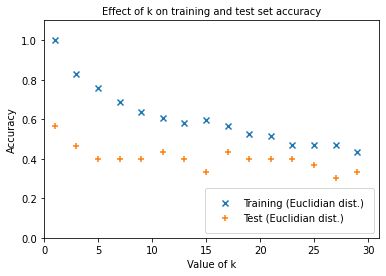

In [23]:
# let's plot the accuracy on the training and test set
import matplotlib.pyplot as plt
plt.scatter(k_values,accuracy_training_k,marker="x")
plt.scatter(k_values,accuracy_test_k,marker="+")
plt.xlim([0, max(k_values)+2])
plt.ylim([0.0, 1.1])
plt.xlabel("Value of k")
plt.ylabel("Accuracy")
legend_labels = ["Training (Euclidian dist.)","Test (Euclidian dist.)"]
plt.legend(labels=legend_labels, loc=4, borderpad=1)
plt.title("Effect of k on training and test set accuracy", fontsize=10)
plt.show()

In [30]:
# Now let's explore the impact of using a different distance metric by changing the value of p used in the Minkowski formula
p_values = list(range(1,5))
# print(p_values)

accuracy_training_k_p = []
accuracy_test_k_p = []
for j in range(len(p_values)):
    accuracy_training_k_p.append([])
    accuracy_test_k_p.append([])    

    for k in k_values:
        model_k_p = neighbors.KNeighborsClassifier(n_neighbors=k, p=p_values[j])
        model_k_p.fit(X_training, y_training)

        # compute the predictions for the training and test sets
        predictions_training_k_p = model_k_p.predict(X_training)
        predictions_test_k_p = model_k_p.predict(X_test)

        # compute the accuracy on the training and test set predictions
        accuracy_training_k_p[j].append(metrics.accuracy_score(y_training, predictions_training_k_p))
        accuracy_test_k_p[j].append(metrics.accuracy_score(y_test, predictions_test_k_p))

    print("p =",p_values[j],"training",accuracy_training_k_p[j],"\n")
    print("p =",p_values[j],"test",accuracy_test_k_p[j],"\n")

p = 1 training [1.0, 0.8306451612903226, 0.8064516129032258, 0.75, 0.75, 0.717741935483871, 0.7016129032258065, 0.6854838709677419, 0.6451612903225806, 0.6854838709677419, 0.6451612903225806, 0.5806451612903226, 0.5564516129032258, 0.5645161290322581, 0.5645161290322581] 

p = 1 test [0.7, 0.7, 0.5333333333333333, 0.43333333333333335, 0.4666666666666667, 0.4, 0.5, 0.4666666666666667, 0.4666666666666667, 0.5, 0.4666666666666667, 0.5, 0.43333333333333335, 0.5, 0.4666666666666667] 

p = 2 training [1.0, 0.8306451612903226, 0.7580645161290323, 0.6854838709677419, 0.6370967741935484, 0.6048387096774194, 0.5806451612903226, 0.5967741935483871, 0.5645161290322581, 0.5241935483870968, 0.5161290322580645, 0.46774193548387094, 0.46774193548387094, 0.46774193548387094, 0.43548387096774194] 

p = 2 test [0.5666666666666667, 0.4666666666666667, 0.4, 0.4, 0.4, 0.43333333333333335, 0.4, 0.3333333333333333, 0.43333333333333335, 0.4, 0.4, 0.4, 0.36666666666666664, 0.3, 0.3333333333333333] 

p = 3 train

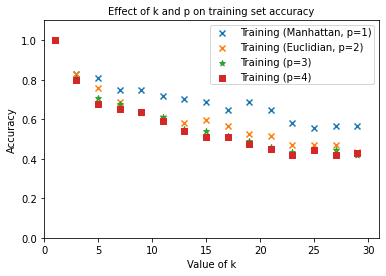

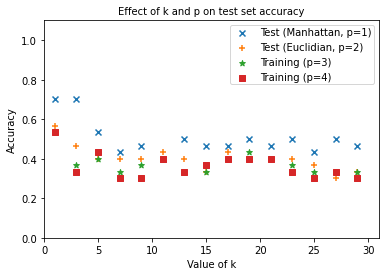

In [32]:
# let's plot the accuracy on the training set
import matplotlib.pyplot as plt
plt.scatter(k_values,accuracy_training_k_p[0],marker="x")
plt.scatter(k_values,accuracy_training_k_p[1],marker="x")
plt.scatter(k_values,accuracy_training_k_p[2],marker="*")
plt.scatter(k_values,accuracy_training_k_p[3],marker="s")
plt.xlim([0, max(k_values)+2])
plt.ylim([0.0, 1.1])
plt.xlabel("Value of k")
plt.ylabel("Accuracy")
legend_labels = ["Training (Manhattan, p=1)","Training (Euclidian, p=2)","Training (p=3)","Training (p=4)"]
plt.legend(labels=legend_labels, loc=1, borderpad=0.2)
plt.title("Effect of k and p on training set accuracy", fontsize=10)
plt.show()

# let's plot the accuracy on the test set
import matplotlib.pyplot as plt
plt.scatter(k_values,accuracy_test_k_p[0],marker="x")
plt.scatter(k_values,accuracy_test_k_p[1],marker="+")
plt.scatter(k_values,accuracy_test_k_p[2],marker="*")
plt.scatter(k_values,accuracy_test_k_p[3],marker="s")
plt.xlim([0, max(k_values)+2])
plt.ylim([0.0, 1.1])
plt.xlabel("Value of k")
plt.ylabel("Accuracy")
legend_labels = ["Test (Manhattan, p=1)","Test (Euclidian, p=2)","Training (p=3)","Training (p=4)"]
plt.legend(labels=legend_labels, loc=1, borderpad=0.2)
plt.title("Effect of k and p on test set accuracy", fontsize=10)
plt.show()

In [33]:
# Now let's explore the impact of using a different weighting scheme
w_values = ["uniform","distance"]
accuracy_training_k_p_w = []
accuracy_test_k_p_w = []

for i in range(len(w_values)):
    accuracy_training_k_p_w.append([])
    accuracy_test_k_p_w.append([])
    
    for j in range(len(p_values)):
        accuracy_training_k_p_w[i].append([])
        accuracy_test_k_p_w[i].append([])    

        for k in k_values:
            model_k_p_w = neighbors.KNeighborsClassifier(n_neighbors=k, p=p_values[j], weights=w_values[i])
            model_k_p_w.fit(X_training, y_training)

            # compute the predictions for the training and test sets
            predictions_training_k_p_w = model_k_p_w.predict(X_training)
            predictions_test_k_p_w = model_k_p_w.predict(X_test)

            # compute the accuracy on the training and test set predictions
            accuracy_training_k_p_w[i][j].append(metrics.accuracy_score(y_training, predictions_training_k_p_w))
            accuracy_test_k_p_w[i][j].append(metrics.accuracy_score(y_test, predictions_test_k_p_w))

        print("w =",w_values[i],",p =",p_values[j],"training",accuracy_training_k_p_w[i][j],"\n")
        print("w =",w_values[i],",p =",p_values[j],"test",accuracy_test_k_p_w[i][j],"\n")

w = uniform ,p = 1 training [1.0, 0.8306451612903226, 0.8064516129032258, 0.75, 0.75, 0.717741935483871, 0.7016129032258065, 0.6854838709677419, 0.6451612903225806, 0.6854838709677419, 0.6451612903225806, 0.5806451612903226, 0.5564516129032258, 0.5645161290322581, 0.5645161290322581] 

w = uniform ,p = 1 test [0.7, 0.7, 0.5333333333333333, 0.43333333333333335, 0.4666666666666667, 0.4, 0.5, 0.4666666666666667, 0.4666666666666667, 0.5, 0.4666666666666667, 0.5, 0.43333333333333335, 0.5, 0.4666666666666667] 

w = uniform ,p = 2 training [1.0, 0.8306451612903226, 0.7580645161290323, 0.6854838709677419, 0.6370967741935484, 0.6048387096774194, 0.5806451612903226, 0.5967741935483871, 0.5645161290322581, 0.5241935483870968, 0.5161290322580645, 0.46774193548387094, 0.46774193548387094, 0.46774193548387094, 0.43548387096774194] 

w = uniform ,p = 2 test [0.5666666666666667, 0.4666666666666667, 0.4, 0.4, 0.4, 0.43333333333333335, 0.4, 0.3333333333333333, 0.43333333333333335, 0.4, 0.4, 0.4, 0.36666

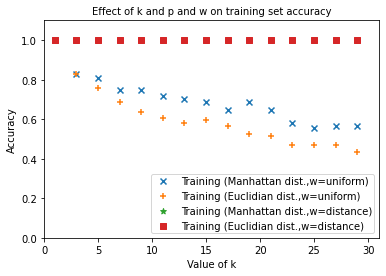

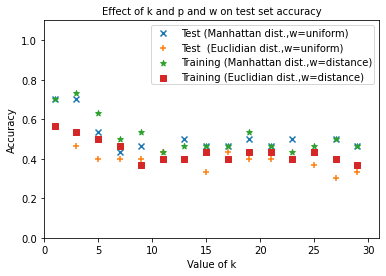

In [36]:
# let's plot the accuracy on the training set
import matplotlib.pyplot as plt
plt.scatter(k_values,accuracy_training_k_p_w[0][0],marker="x")
plt.scatter(k_values,accuracy_training_k_p_w[0][1],marker="+")
plt.scatter(k_values,accuracy_training_k_p_w[1][0],marker="*")
plt.scatter(k_values,accuracy_training_k_p_w[1][1],marker="s")
plt.xlim([0, max(k_values)+2])
plt.ylim([0.0, 1.1])
plt.xlabel("Value of k")
plt.ylabel("Accuracy")
legend_labels = ["Training (Manhattan dist.,w=uniform)","Training (Euclidian dist.,w=uniform)",
                 "Training (Manhattan dist.,w=distance)","Training (Euclidian dist.,w=distance)"]
plt.legend(labels=legend_labels, loc=4, borderpad=0.2)
plt.title("Effect of k and p and w on training set accuracy", fontsize=10)
plt.show()

# let's plot the accuracy on the test set
import matplotlib.pyplot as plt
plt.scatter(k_values,accuracy_test_k_p_w[0][0],marker="x")
plt.scatter(k_values,accuracy_test_k_p_w[0][1],marker="+")
plt.scatter(k_values,accuracy_test_k_p_w[1][0],marker="*")
plt.scatter(k_values,accuracy_test_k_p_w[1][1],marker="s")
plt.xlim([0, max(k_values)+2])
plt.ylim([0.0, 1.1])
plt.xlabel("Value of k")
plt.ylabel("Accuracy")
legend_labels = ["Test (Manhattan dist.,w=uniform)","Test  (Euclidian dist.,w=uniform)",
                 "Training (Manhattan dist.,w=distance)","Training (Euclidian dist.,w=distance)"]
plt.legend(labels=legend_labels, loc=1, borderpad=0.2)
plt.title("Effect of k and p and w on test set accuracy", fontsize=10)
plt.show()

In [28]:
# let's find the best test set accuracy, using numpy
import numpy as np
np_array = np.array(accuracy_test_k_p_w)
max_index = np.unravel_index(np_array.argmax(), np_array.shape)
print("Max test set accuracy:",np_array.max())
print("Index of max test set accuracy:",max_index)
print("Hyperparameter values: w =",w_values[max_index[0]],"p =",p_values[max_index[1]],"k =",k_values[max_index[2]]) 

Max test set accuracy: 0.7333333333333333
Index of max test set accuracy: (1, 0, 1)
Hyperparameter values: w = distance p = 1 k = 3


Key take away points from this worked example:
* Distance weighting seems to work better than uniform weighting on the beer dataset
* Manhattan distance seems to work best of the 4 distance metrics tested on the beer dataset
* Lower values of k seem to work better thna higher values on the beer dataset
* It is important to look at accuracy on both the training and test sets when deciding on model parameters
* Training set accuracy is usually much higher than test set accuracy
* The best test set accuracy we found on the beer dataset was with distance weighting, Manhattan distance and k=3. This combination also achieves 100% training set accuracy
* We have manually explored hyperparameter values in this example, however scikit-learn provides a class called GridSearchCV which can automate the hyperparameter search process (we will cover this in a later lecture)  